In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import nsat

In [2]:
collated_eos = pd.read_csv('collated_eos.csv')
abs_nterm = collated_eos['abs_nterm']/nsat

When evaluating the pQCD likelihood we require the EOS properties at a particular number density. We can try and extract these properties without any interpolation by using the EOS data at the nearest number density to the one we are interested in, but this introduces an error:

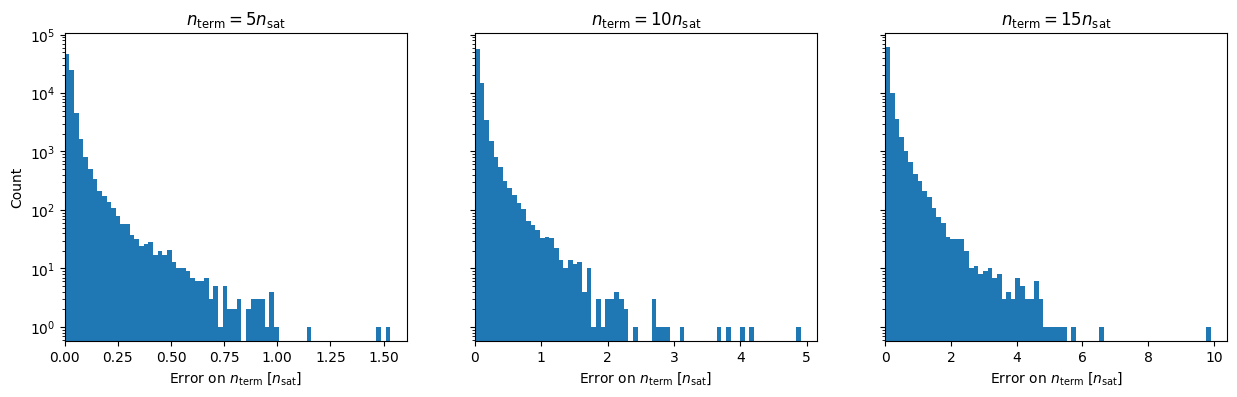

In [3]:
nterm_list = [5, 10, 15]

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axs[0].set_yscale('log')

for i, nterm in enumerate(nterm_list):

    # Load the error on nterm when interpolation is not used, and convert to 
    # units of nuclear saturation density
    nterm_error = np.loadtxt(f'nterm_errors/nterm_errors_ns{nterm:02}.dat')/nsat

    axs[i].hist(nterm_error, bins=70)

    axs[i].set_xlim(0)

    axs[i].set_title(f'$n_\mathrm{{term}} = {nterm}n_\mathrm{{sat}}$')
    axs[i].set_xlabel('Error on $n_\mathrm{term}$ [$n_\mathrm{sat}$]')

_ = axs[0].set_ylabel('Count')

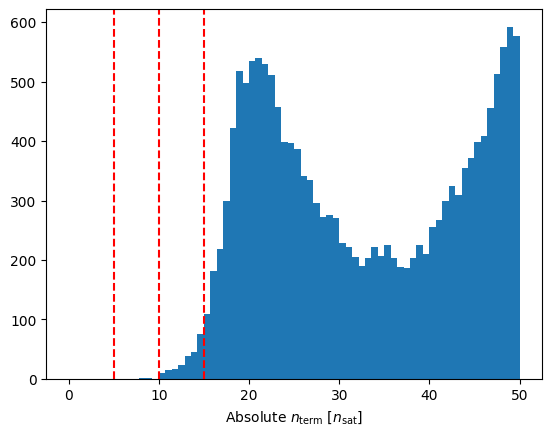

In [4]:
# Anything above 0.5 is not great. This is partly due to some EOSs not actually
# reaching nterm:

fig, ax = plt.subplots()

ax.hist(abs_nterm, bins=70, range=(0, 50))

for nterm in nterm_list:
    ax.axvline(nterm, color='r', linestyle='--')

_ = ax.set_xlabel('Absolute $n_\mathrm{term}$ [$n_\mathrm{sat}$]')

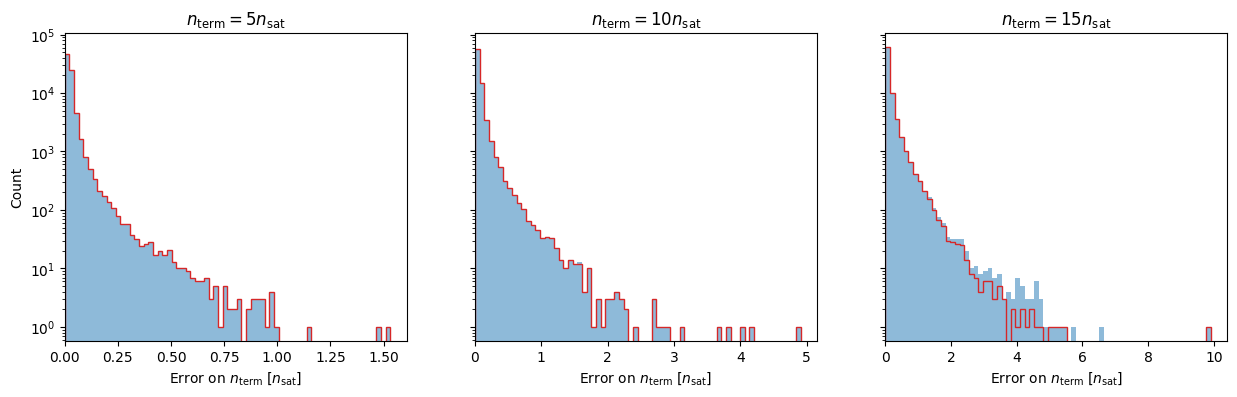

In [5]:
# So we can filter these out...

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axs[0].set_yscale('log')

for i, nterm in enumerate(nterm_list):

    nterm_error = np.loadtxt(f'nterm_errors/nterm_errors_ns{nterm:02}.dat')/nsat
    axs[i].hist(nterm_error, bins=70, alpha=0.5)

    filter = abs_nterm > nterm
    axs[i].hist(nterm_error[filter], bins=70, histtype='step', color='C3')

    axs[i].set_xlim(0)

    axs[i].set_title(f'$n_\mathrm{{term}} = {nterm}n_\mathrm{{sat}}$')
    axs[i].set_xlabel('Error on $n_\mathrm{term}$ [$n_\mathrm{sat}$]')

_ = axs[0].set_ylabel('Count')

So we need to interpolate...